<a href="https://colab.research.google.com/github/ReneeZhang2017/Zillow/blob/master/Zillow_data_Renee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore Zillow

## Ingest

In [0]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/real_estate_ml/master/data/Zip_Zhvi_SingleFamilyResidence_2018.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.000,335400.000,336500.000,...,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.000,212200.000,212200.000,...,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.000,500900.000,503100.000,...,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.000,77300.000,77300.000,...,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.000,95600.000,95800.000,...,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700


## EDA

In [0]:
df.shape

(15508, 280)

In [0]:
df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))


In [0]:
df.describe()

,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
count,15508.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,14338.000,...,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000,15508.000
mean,7754.500,115889.866,116007.379,116123.051,116235.493,116358.920,116501.681,116689.315,116907.581,117238.332,...,279359.582,280672.685,282148.749,283446.447,284466.282,285500.200,286717.307,288029.320,289187.510,290106.635
std,4476.918,85115.825,85264.209,85413.118,85566.676,85744.243,85958.867,86230.630,86549.402,86971.783,...,361868.364,361360.576,363102.089,365301.815,366277.876,367095.613,366772.521,364624.171,361143.146,359132.687
min,1.000,11300.000,11500.000,11600.000,11800.000,11800.000,12000.000,12100.000,12200.000,12300.000,...,21700.000,21700.000,22100.000,22200.000,22000.000,21800.000,21700.000,21500.000,21600.000,21900.000
25%,3877.750,66700.000,66800.000,66925.000,67100.000,67200.000,67300.000,67500.000,67600.000,67900.000,...,128300.000,128800.000,129675.000,130300.000,131100.000,131900.000,132900.000,134000.000,135100.000,135600.000
50%,7754.500,96500.000,96700.000,96750.000,96900.000,96900.000,97000.000,97150.000,97400.000,97550.000,...,191100.000,192150.000,193400.000,194600.000,195700.000,196900.000,198100.000,199600.000,201100.000,202150.000
75%,11631.250,140500.000,140600.000,140600.000,140800.000,141000.000,141100.000,141300.000,141400.000,141700.000,...,310750.000,312300.000,314325.000,316100.000,317425.000,318325.000,319800.000,321200.000,322425.000,323900.000
max,15508.000,3676700.000,3704200.000,3729600.000,3754600.000,3781800.000,3813500.000,3849600.000,3888900.000,3928800.000,...,17724700.000,17408900.000,17450500.000,17722800.000,18006700.000,18273800.000,18331900.000,18131900.000,17594900.000,17119600.000


### 1. Visualize median price of San Francisco, Chicago, New York and median price of USA through the time

In [0]:
median_prices = df.median()
median_prices.tail()


2018-08   196900.000
2018-09   198100.000
2018-10   199600.000
2018-11   201100.000
2018-12   202150.000
dtype: float64

In [0]:
sf_df = df[df["City"] == "San Francisco"].median()
ch_df = df[df["City"] == "Chicago"].median()
ny_df = df[df["City"] == "New York"].median()
df_comparison = pd.concat([sf_df,ch_df,ny_df,median_prices], axis=1)
df_comparison.columns = ["San Francisco","Chiacago","New York","Median USA"]
df_comparison.tail()


,San Francisco,Chiacago,New York,Median USA
2018-08,1828600.000,354850.000,756500.000,196900.000
2018-09,1823200.000,353800.000,752650.000,198100.000
2018-10,1823700.000,352900.000,753250.000,199600.000
2018-11,1813400.000,351600.000,758100.000,201100.000
2018-12,1806000.000,351150.000,758550.000,202150.000


In [0]:
!pip uninstall -q -y plotly
!pip install -q plotly
!pip install -q --upgrade cufflinks

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [0]:
from plotly.offline import init_notebook_mode
enable_plotly_in_cell()
init_notebook_mode(connected=False)

import cufflinks as cf
cf.go_offline()
df_comparison.iplot(title="Bay Area Median Single Family Home Prices 1996-2018",
                    xTitle="Year",
                    yTitle="Sales Price",
                    bestfit=True, bestfit_colors=["pink"],
                   #subplots=True,
                   shape=(4,1),
                    #subplot_titles=True,
                    fill=True,)

### 2. Visualize the relationship between size rank and sales price on 2018-01

In [0]:
df_size=df[(df["City"] == "San Francisco") | (df["City"] =="Chicago")|(df["City"]=="New York")]
price_2018=df_size["2018-01"]
df_vs = pd.concat([df_size["City"],df_size["SizeRank"],price_2018,], axis=1)
df_vs.head(5)

,City,SizeRank,2018-01
0,Chicago,1,1028900
2,Chicago,3,1310100
6,New York,7,413100
7,Chicago,8,782500
8,New York,9,894600


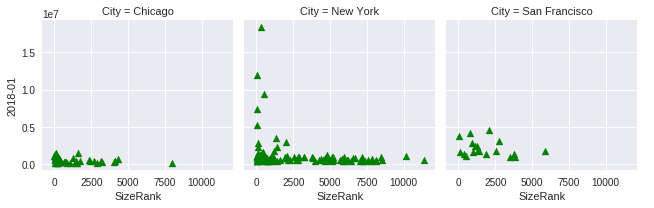

In [0]:
g = sns.FacetGrid(df_vs, col="City")
g = (g.map(plt.scatter,"SizeRank", "2018-01",marker='^',color="green")
       .add_legend())

### 3. Visualize the relationship between higest 15 States and Price

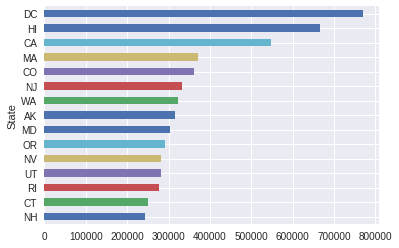

In [0]:
x = df.groupby('State')['2018-01'].median().sort_values().tail(15)
x.plot(kind='barh')

### 4. Visualize the relationship between appreciation rate and state in most recent 5 years

In [0]:
df_4=pd.concat([df["State"],df["City"]], axis=1)
df_4['2014']=round(df["2014-12"]/df["2014-01"],2)
df_4['2015']=round(df["2015-12"]/df["2015-01"],2)
df_4['2016']=round(df["2016-12"]/df["2016-01"],2)
df_4['2017']=round(df["2017-12"]/df["2017-01"],2)
df_4['2018']=round(df["2018-12"]/df["2018-01"],2)
df_4=df_4.drop(columns=["State"],axis=1)
sf= df_4[df_4["City"] == "San Francisco"].median()
ch= df_4[df_4["City"] == "Chicago"].median()
ny= df_4[df_4["City"] == "New York"].median()
df_c = pd.concat([sf,ch,ny], axis=1)
df_c.columns = ["San Francisco","Chicago","New York"]
df_c

,San Francisco,Chicago,New York
2014,1.140,1.050,1.080
2015,1.110,1.055,1.075
2016,1.030,1.065,1.070
2017,1.080,1.040,1.060
2018,1.060,1.015,1.060


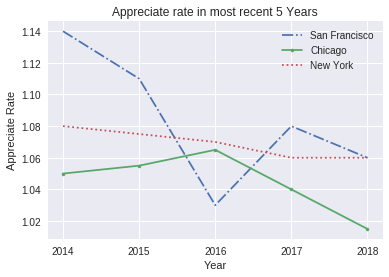

In [0]:
fig = plt.figure()
ax = plt.axes()
plt.plot(df_c["San Francisco"],linestyle='-.',label='San Francisco')
plt.plot(df_c["Chicago"],marker=".",label='Chicago')
plt.plot(df_c["New York"],linestyle=':',label='New York')
plt.legend()
plt.title("Appreciate rate in most recent 5 Years")
plt.xlabel("Year")
plt.ylabel("Appreciate Rate");

## Modeling





*   Create a time series forecast
*   Find a second model using traditional machine learning (can also find 3rd party data)
*   Nice to have (create a sophisticated prediction):  https://www.kaggle.com/c/house-prices-advanced-regression-techniques



### Time series forecast---ARIMA model

In [0]:
from statsmodels.tsa.arima_model import ARIMA 

In [0]:
df_comparison=df_comparison.reset_index()
df_comparison=df_comparison.drop([0,1,2],axis=0)

In [0]:
df_comparison.columns=["Date","San Francisco","Chicago","New York","Median USA"]
df_comparison=df_comparison.reset_index(drop=True)
df_comparison=df_comparison.drop(columns=["San Francisco","Chicago","New York"],axis=1)
df_comparison.head()

,Date,Median USA
0,1996-04,96500.000
1,1996-05,96700.000
2,1996-06,96750.000
3,1996-07,96900.000
4,1996-08,96900.000


In [0]:
df_comparison["Date"]=pd.to_datetime(df_comparison["Date"],infer_datetime_format=True)
dataset=df_comparison.set_index(["Date"])
dataset.head()

,Median USA
Date,
1996-04-01,96500.000
1996-05-01,96700.000
1996-06-01,96750.000
1996-07-01,96900.000
1996-08-01,96900.000


In [0]:
dataset.shape

(273, 1)

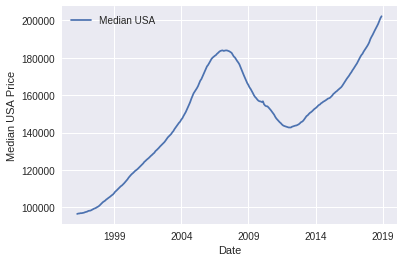

In [0]:
from matplotlib import pyplot
dataset.plot()
plt.xlabel('Date')
plt.ylabel('Median USA Price')
pyplot.show()

### Check stationarity of the data

In [0]:
#Determine rolling statistics
rolmean = dataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = dataset.rolling(window=12).std()
print(rolmean,rolstd)

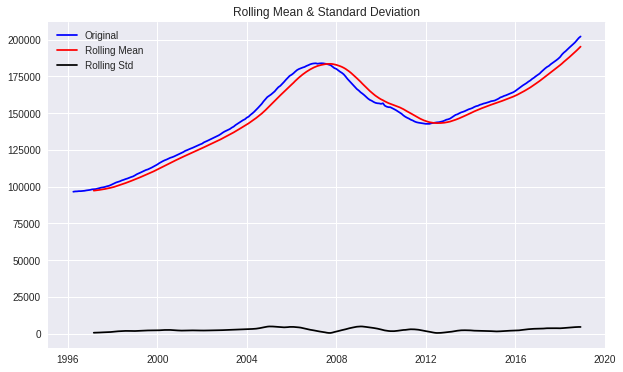

In [0]:
#Plot rolling statistics
orig = plt.plot(dataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

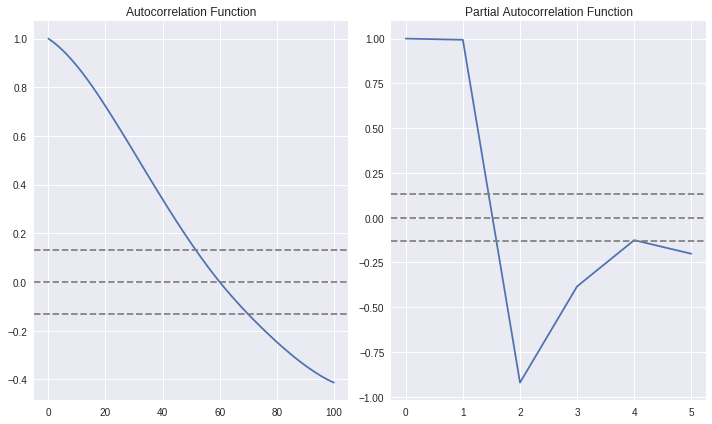

In [0]:
#ACF & PACF plots

lag_acf = acf(train, nlags=100)
lag_pacf = pacf(train, nlags=5, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 

In [0]:
X=dataset["Median USA"].values
X = X.reshape(-1, 1)
train = X[0:218]
test = X[218:]

In [0]:
model_arima = ARIMA(train,order=(2,2,3))
model_arima_fit=model_arima.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [0]:
predictions = model_arima_fit.forecast(steps=55)[0]
predictions

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([155419.65385915, 155842.65774488, 156279.45527281, 156702.90279937,
       157139.86174528, 157569.52815093, 158006.00733077, 158440.62662762,
       158878.2667259 , 159316.43348418, 159756.24719956, 160197.30844073,
       160639.68020007, 161083.42911807, 161528.45877859, 161974.85443916,
       162422.55359646, 162871.59706253, 163321.96053802, 163773.6572539 ,
       164226.68071999, 164681.0336691 , 165136.71526646, 165593.72550913,
       166052.06468737, 166511.73247656, 166972.7291411 , 167435.05449596,
       167898.70865783, 168363.69155941, 168830.00323608, 169297.64367129,
       169766.61287144, 170236.91083504, 170708.53756156, 171181.49305211,
       171655.77730563, 172131.39032292, 172608.33210345, 173086.60264754,
       173566.20195501, 174047.13002596, 174529.38686033, 175012.97245816,
       175497.88681942, 175984.12994413, 176471.70183229, 176960.60248388,
       177450.83189893, 177942.39007741, 178435.27701934, 178929.49272471,
       179425.03719353, 1

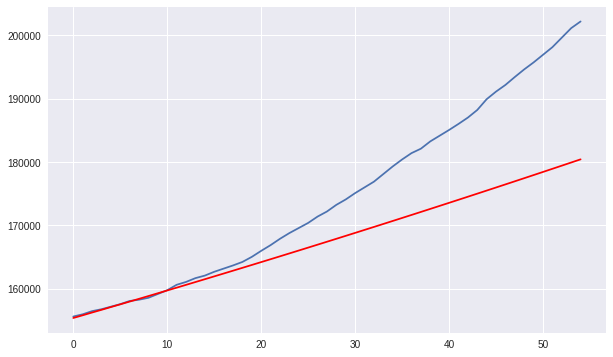

In [0]:
plt.plot(test)
plt.plot(predictions,color='red')

## Conclusion

My Times series model didn't fit well to the real data.


